In [42]:
import numpy as np
import pandas as pa
import matplotlib.pyplot as plt
%matplotlib inline

from numpy.linalg import eig, inv

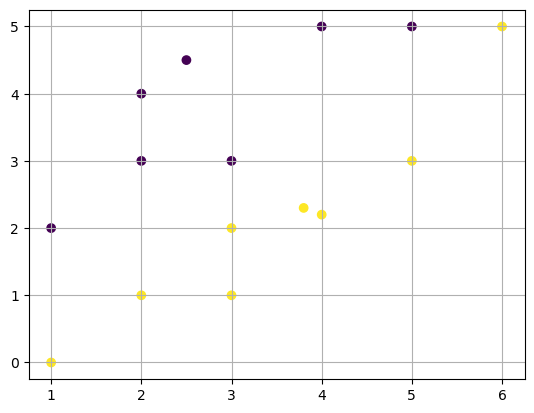

In [43]:
dict = {'X1': [1, 2, 3, 4, 5, 1, 2, 3, 3, 5, 6, 2, 2.5, 4, 3.8],
       'X2': [2, 3, 3, 5, 5, 0, 1, 1, 2, 3, 5, 4, 4.5, 2.2, 2.3],
       'C': [1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2]}
data = pa.DataFrame(data=dict)

plt.grid()
plt.scatter(data.X1, data.X2, c=data.C)

### Voyons ce que ça donne avec une ACP :

[0.79447585 0.20552415]


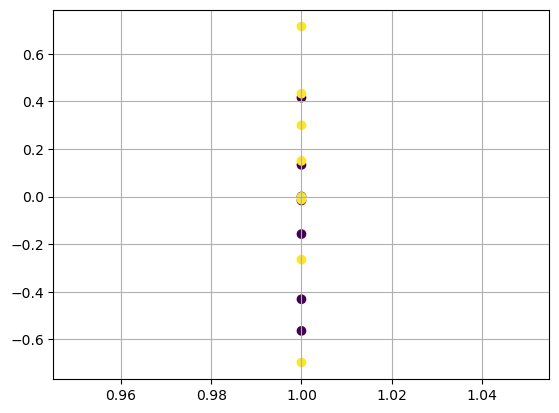

In [44]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import minmax_scale
Z = minmax_scale(X)
# Z = ms.fit_transform(X)
acp = PCA()
Y = acp.fit_transform(Z)
print(acp.explained_variance_ratio_)
plt.grid()
plt.scatter(np.ones(len(Y)), Y[:, 0], c=data.C)

### LDA à la main

In [45]:
X = data[['X1', 'X2']]

C1 = X[data.C==1]
C2 = X[data.C==2]
mu1 = C1.mean()
mu2 = C2.mean()
print('mu1: ', mu1)
print('mu2: ', mu2)

s1 = C1.cov()
s2 = C2.cov()
print('s1: ', s1)
print('s2: ', s2)

Sw = s1 + s2
print('Sw: ', Sw)

invSw =  inv(Sw)
print('Sw^-1: ', invSw)

v = np.matmul(invSw, mu1 - mu2)
print('v: ', v)

mu1:  X1    2.785714
X2    3.785714
dtype: float64
mu2:  X1    3.4750
X2    2.0625
dtype: float64
s1:            X1        X2
X1  1.821429  1.238095
X2  1.238095  1.321429
s2:            X1        X2
X1  2.547857  2.314643
X2  2.314643  2.299821
Sw:            X1        X2
X1  4.369286  3.552738
X2  3.552738  3.621250
Sw^-1:  [[ 1.13152467 -1.1101169 ]
 [-1.1101169   1.36526188]]
v:  [-2.69291309  3.11782649]


In [46]:
# X = data[['X1', 'X2']]
y = np.dot(v.T, X.T)
print(y)

[ 3.5427399   3.96765331  1.27474023  4.81748013  2.12456704 -2.69291309
 -2.26799968 -4.96091276 -1.84308627 -4.11108594 -0.56834604  7.08547981
  7.29793651 -3.91243405 -3.06206879]


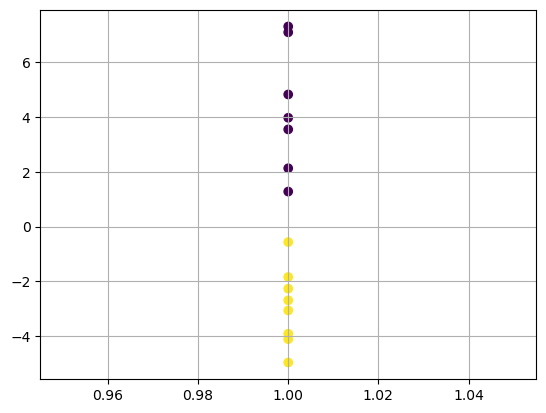

In [47]:
plt.grid()
plt.scatter(np.ones(len(X)), y, c=data.C)

### LDA avec sklearn 

In [48]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()

Z = minmax_scale(X)

Y = lda.fit_transform(Z, data.C)
Y

array([[-1.67733771],
       [-1.89426317],
       [-0.44451723],
       [-2.3281141 ],
       [-0.87836816],
       [ 1.6560051 ],
       [ 1.43907964],
       [ 2.88882558],
       [ 1.22215417],
       [ 2.45497465],
       [ 0.57137778],
       [-3.56093457],
       [-3.66939731],
       [ 2.33856583],
       [ 1.8819495 ]])

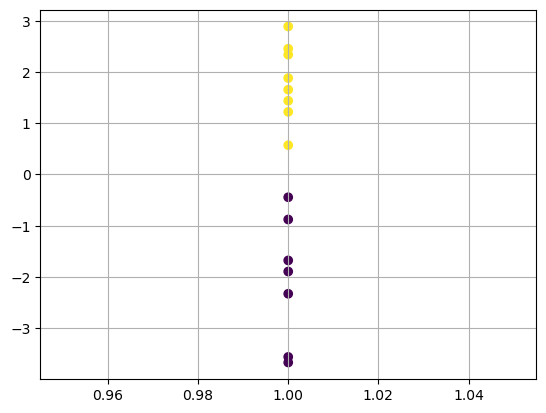

In [49]:
plt.grid()
plt.scatter(np.ones(len(Y)), Y[:, 0], c=data.C)